## Week 1
Produce a Jupyter notebook with a data report to document:

a. the structure and statistics of the raw data

b. how the data can help answer the business problem(s)

c. what additional data is needed to answer the business problem(s)

Locate the additional data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore") 

from datetime import datetime
from IPython.display import display, Markdown
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
collisions_df = pd.read_csv('../data/Collisions.csv')
intersections_df = pd.read_csv('../data/Intersections.csv')
streets_df = pd.read_csv('../data/Seattle_Streets.csv')

## EXPLORING SEATTLE STREET DATA

In [4]:
streets_df.head()

,OBJECTID,ARTCLASS,COMPKEY,UNITID,UNITID2,UNITIDSORT,UNITDESC,STNAME_ORD,XSTRLO,XSTRHI,ARTDESCRIPT,OWNER,STATUS,BLOCKNBR,SPEEDLIMIT,SEGDIR,ONEWAY,ONEWAYDIR,FLOW,SEGLENGTH,SURFACEWIDTH,SURFACETYPE_1,SURFACETYPE_2,INTRLO,DIRLO,INTKEYLO,INTRHI,DIRHI,NATIONHWYSYS,STREETTYPE,PVMTCONDINDX1,PVMTCONDINDX2,TRANCLASS,TRANDESCRIPT,SLOPE_PCT,PVMTCATEGORY,PARKBOULEVARD,SHAPE_Length
0,1,2.0,1006,10.0,120.0,100120.0,1ST AVE BETWEEN SENECA ST AND UNIVERSITY ST,1ST AVE,SENECA ST,UNIVERSITY ST,Minor Arterial,,INSVC,1200.0,25.0,NW,N,,,306.0,48.0,PCC,AC/PCC,1ST AVE AND SENECA ST,NW,29611.0,1ST AVE AND UNIVERSITY ST,SE,N,Downtown Neighborhood,87.0,62.0,1,PRINCIPAL TRANSIT ROUTE,4.0,ART,N,305.966050
1,2,2.0,1009,10.0,150.0,100150.0,1ST AVE BETWEEN PIKE ST AND PINE ST,1ST AVE,PIKE ST,PINE ST,Minor Arterial,,INSVC,1500.0,25.0,NW,N,,,426.0,104.0,AC/PCC,PCC,1ST AVE AND PIKE ST,NW,29593.0,1ST AVE AND PINE ST,SE,N,Downtown Neighborhood,57.0,58.0,1,PRINCIPAL TRANSIT ROUTE,5.0,ART,N,426.031562
2,3,0.0,1032,15.0,80.0,150080.0,1ST AVE N BETWEEN VALLEY UPPER ST AND ALOHA ST,1ST AVE N,VALLEY UPPER ST,ALOHA ST,Not Designated,,INSVC,800.0,20.0,N,N,,,297.0,0.0,PCC,NaN,1ST AVE N AND VALLEY UPPER ST,N,28897.0,1ST AVE N AND ALOHA ST,S,N,Neighborhood Yield Street,0.0,0.0,0,NOT DESIGNATED,17.0,NON-ART,N,297.147592
3,4,0.0,1051,15.0,230.0,150230.0,1ST AVE N BETWEEN LYNN ST AND MCGRAW S ST,1ST AVE N,LYNN ST,MCGRAW S ST,Not Designated,,INSVC,2200.0,20.0,N,N,,,175.0,25.0,AC,NaN,1ST AVE N AND LYNN ST,N,28113.0,1ST AVE N AND MCGRAW S ST,S,N,Neighborhood Yield Street,9.0,0.0,0,NOT DESIGNATED,3.0,NON-ART,N,174.804983
4,5,0.0,1060,15.0,282.0,150282.0,1ST AVE N BETWEEN FULTON S ST AND FULTON N ST,1ST AVE N,FULTON S ST,FULTON N ST,Not Designated,,INSVC,2800.0,20.0,N,N,,,73.0,0.0,PCC,NaN,1ST AVE N AND FULTON S ST,N,28051.0,1ST AVE N AND FULTON N ST,S,N,Neighborhood Yield Street,0.0,0.0,0,NOT DESIGNATED,5.0,NON-ART,N,73.110708


In [5]:
streets_df.shape

(23806, 38)

ABOUT THE DATA FEATURES
OBJECTID - ESRI unique identifier

ARTCLASS - Arterial classification code:

5 - Interstate Freeway
4 - State Highway
3 - Collector Arterial
2 - Minor Arterial
1 - Principal Arterial
0 - Not Designated (not an arterial)
COMPKEY - Primary key of the Street asset table, assigned by the Hansen asset management system.

UNITID - N/A

UNITID2 - N/A

UNITIDSORT - Alpha-numeric Hansen unique identifier

UNITIDESC - Structured description of the Street location

STNAME_ORD - Street segment name

XSTRLO - Cross street at low end of segment

XSTRHI - Cross street at high end of segment

ARTDESCRIPT - Arterial class code description

OWNER - The organization that owns the street, if not the city

STATUS - Current street status INSVC = in service

BLOCKNBR - Identification number of block street runs adjacent to

SPEEDLIMIT - Speed limit in MPH

SEGDIR - Street segment direction

ONEWAY - One Way Street (Y/N)

ONEWAYDIR - One Way Street traffic flow direction

FLOW - One Way Street traffic flow classification

SEGLENGTH - Street segment length in feet

SURFACEWIDTH - Street segment width in feet

SURFACETYPE_1 - Primary pavement used on Street surface

AC - Asphalt Concrete
PCC - Rigid Pavement
AC/PCC - Composite AC and PCC
ST - Bituminous Surface Treatment
SURFACETYPE_2 - Secondary pavement used on Street surface

INTRLO - Description of the intersection location with cross street at high address end of segment

DIRLO - Relative direction of low address end of segment

INTKEYLO - Intersection key at low address end of segment

INTRHI - Description of the intersection location with cross street at high address end of segment

DIRHI - Direction of high address end of segment

NATIONHWYSYS - Whether the street is part of the National Highway System (Y/N)

STREETTYPE - Street type classification (from Seattle Right of Way Improvements Manual) https://streetsillustrated.seattle.gov/https-streetsillustrated-seattle-gov-wp-content-uploads-2019-12-streettyperelationships-movementplacev4-jpg/street-classification/

PVMTCONDINDX1 - Primary pavement condition, out of 100

PVMTCONDINDX2 - Secondary pavement condition, out of 100

TRANCLASS - Street transit classification

TRANDESCRIPT - Transit class description

SLOPE_PCT - Street grade in slope percentage

PVMTCATEGORY - N/A

PARKBOULEVARD - N/A

SHAPE_Length - ESRI field that stores information about the length of a feature in GIS

In [8]:
# Consider how many missing and unique values there are in each column
col_na = round(100*(streets_df.isna().sum()/len(streets_df)), 2)
col_nunique = streets_df.nunique()
df_summary = pd.DataFrame({"data_type": streets_df.dtypes,
                           "percent_missing_values": col_na,
                           "total_unique_values": col_nunique}).sort_values(by=["percent_missing_values"],
                                                                            ascending=False)
df_summary

,data_type,percent_missing_values,total_unique_values
SURFACETYPE_2,object,97.13,5
SURFACETYPE_1,object,5.03,6
STREETTYPE,object,3.33,12
TRANDESCRIPT,object,0.79,7
SLOPE_PCT,float64,0.08,34
INTRHI,object,0.05,14234
ONEWAY,object,0.05,2
SURFACEWIDTH,float64,0.04,94
INTKEYLO,float64,0.04,14110
INTRLO,object,0.04,14109


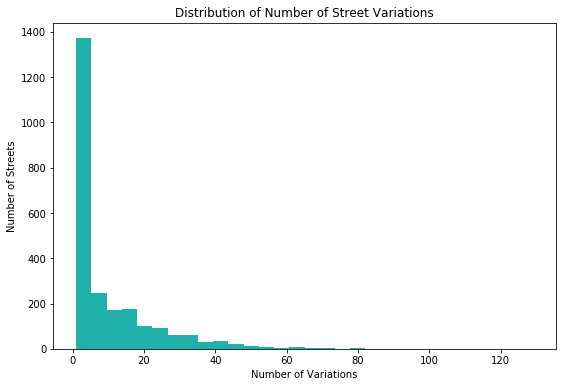

In [11]:
#DISTRIBUTION OF VARIATIONS BY STREET
fig, ax = plt.subplots(figsize=(9,6))
ax.hist(streets_df['STNAME_ORD'].value_counts(), bins=30, color='lightseagreen')
ax.set_title('Distribution of Number of Street Variations')
ax.set_xlabel('Number of Variations')
ax.set_ylabel('Number of Streets');

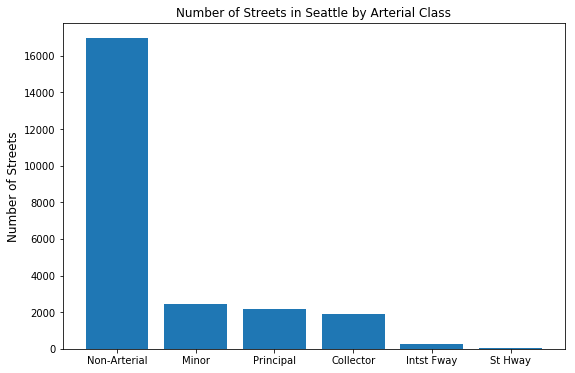

In [12]:
#ARTERIAL CLASS DISTRIBUTION
artclass_dict = {5 : 'Intst Fway',
                 4 : 'St Hway',
                 3 : 'Collector',
                 2 : 'Minor',
                 1 : 'Principal',
                 0 : 'Non-Arterial'}

fig, ax = plt.subplots(figsize=(9,6))
arterials = streets_df.ARTCLASS.value_counts().iloc[:6]

ax.bar([artclass_dict[i] for i in arterials.index], arterials)
ax.set_title('Number of Streets in Seattle by Arterial Class')
ax.set_ylabel('Number of Streets', size=12);

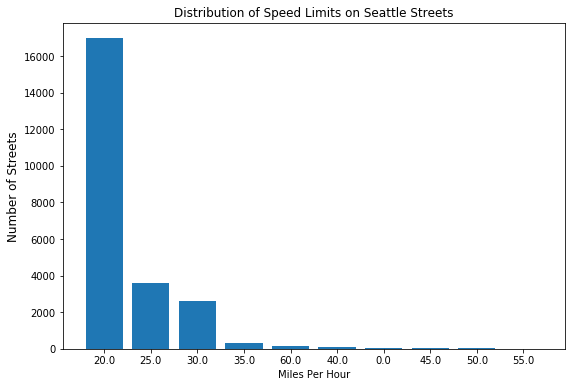

In [13]:
#Speed Limits 
fig, ax = plt.subplots(figsize=(9,6))
speeds = streets_df.SPEEDLIMIT.value_counts()
ax.bar(speeds.index.astype(str), speeds)
ax.set_title('Distribution of Speed Limits on Seattle Streets')
ax.set_xlabel('Miles Per Hour')
ax.set_ylabel('Number of Streets', size=12);

In [15]:
#Look at Collisions not occuring at Intersections
block_mask = collisions_df['ADDRTYPE'] == 'Block'
collision_streets = collisions_df[block_mask]['LOCATION'].apply(lambda string: string.split(' BETWEEN ')[0])

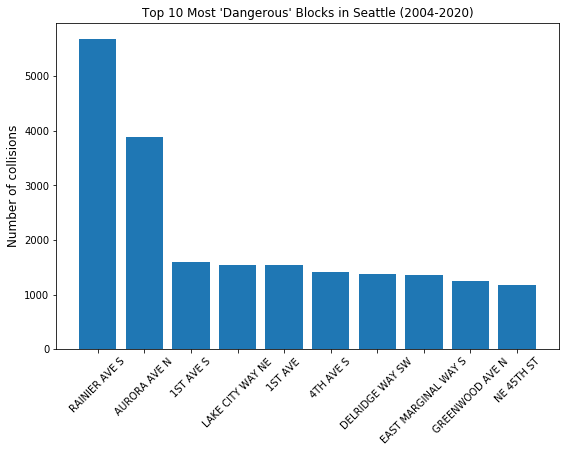

In [16]:
fig, ax = plt.subplots(figsize=(9,6))
top_10 = collision_streets.value_counts().sort_values(ascending=False)[:10]
ax.bar(top_10.index, top_10)
ax.set_title("Top 10 Most 'Dangerous' Blocks in Seattle (2004-2020)")
ax.set_ylabel('Number of collisions', size=12)
ax.tick_params(axis='x', labelrotation=45);

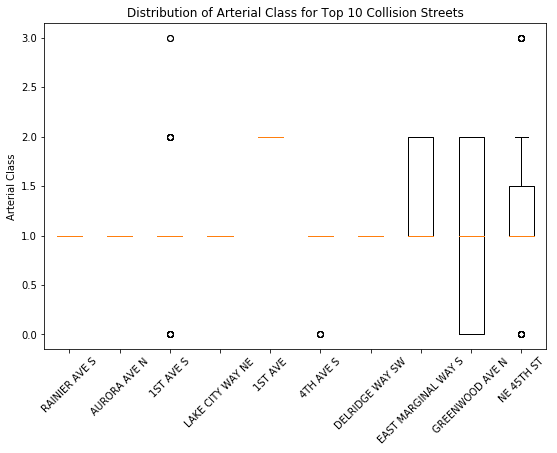

In [17]:
fig, ax = plt.subplots(figsize=(9,6))
classes = [streets_df[streets_df['STNAME_ORD'] == i]['ARTCLASS'].values for i in top_10.index]

ax.boxplot(classes)
ax.set_xticklabels(top_10.index, rotation=45)
ax.set_title('Distribution of Arterial Class for Top 10 Collision Streets')
ax.set_ylabel('Arterial Class');

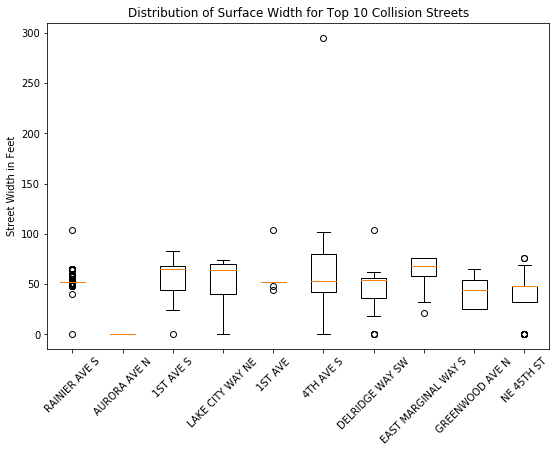

In [20]:
fig, ax = plt.subplots(figsize=(9,6))
slopes = [streets_df[streets_df['STNAME_ORD'] == i]['SURFACEWIDTH'].values for i in top_10.index]

ax.boxplot(slopes)
ax.set_xticklabels(top_10.index, rotation=45)
ax.set_title('Distribution of Surface Width for Top 10 Collision Streets')
ax.set_ylabel('Street Width in Feet');

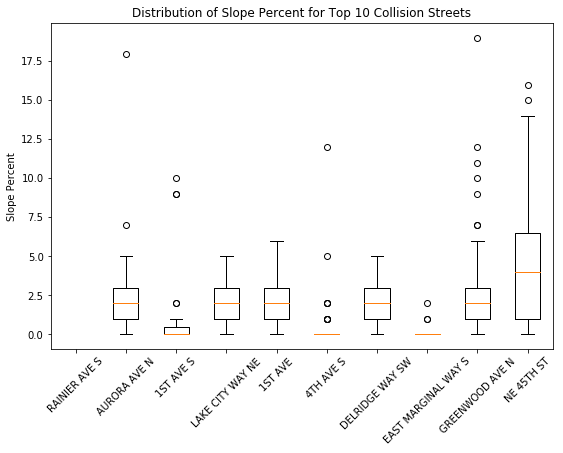

In [22]:
fig, ax = plt.subplots(figsize=(9,6))
slopes = [streets_df[streets_df['STNAME_ORD'] == i]['SLOPE_PCT'].values for i in top_10.index]

ax.boxplot(slopes)
ax.set_xticklabels(top_10.index, rotation=45)
ax.set_title('Distribution of Slope Percent for Top 10 Collision Streets')
ax.set_ylabel('Slope Percent');

# Exploring Collisions Data

The collisions data is a goldmine of information, but there are many features with missing or inconsistent data. Missing data can often be filled in based on the collision description. 

Some features, like speeding, are missing >75% of the data. However, this feature is likely too important to drop completely from our analysis. 

### General Statistics

#### Features

##### Numeric
- PERSONCOUNT (# of people invovled)  
- PEDCOUNT (# of pedestirans)  
- PEDCYLCOUNT (# of cyclists)  
- VEHCOUNT (# of vehicles)
- INJURIES (# of injuries)
- SERIOUSINJURIES (# of serious injuries)
- FATALITIES (# of deaths)  

##### Human factors
- INATTENTIONIND (whether or not collision was due to inattention)
- UNDERINFL (whether or not a driver involved was under the influence)
- PEDROWNOTGRNT(Whether pedestrian had the right of way)
- SPEEDING (whether or not speeding was a factor in the collision)
- ST_COLCODE (collision type label)


##### Characteristics of the site
- ADDRTYPE (address type)
- LOCATION (described in street names)
- X & Y (GPS location)
- CROSSWALKKEY (crosswalk label)
- JUNCTIONTYPE (junction type)
- ROADCOND (road condition)

##### External factors
- LIGHTCOND (light condition)
- WEATHER (description of the weather conditions during the time of the collision)

In [40]:
collisions.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,212975.000000,212975.000000,220436.000000,220436.000000,220436.000000,71516.000000,220436.000000,220436.000000,220436.000000,220436.000000,220436.000000,220436.000000,220436.000000,220435.000000,1.272050e+05,220436.000000,2.204360e+05
mean,-122.330748,47.620232,110218.500000,143893.625937,144116.360395,37614.720790,2.227145,0.038156,0.027310,1.730697,0.373868,0.015165,0.001674,13.382362,7.971063e+06,262.425969,9.617439e+03
std,0.030042,0.056009,63634.536307,88451.013280,88818.314232,51915.702891,1.471406,0.201881,0.164398,0.829041,0.732352,0.158077,0.044493,7.305444,2.611523e+06,3254.921395,7.160964e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577331,55109.750000,71395.750000,71395.750000,28652.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330348,47.616106,110218.500000,126707.500000,126707.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664261,165327.250000,208526.250000,208726.250000,33983.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,220436.000000,332640.000000,334140.000000,757580.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


#### Missing Values in Data

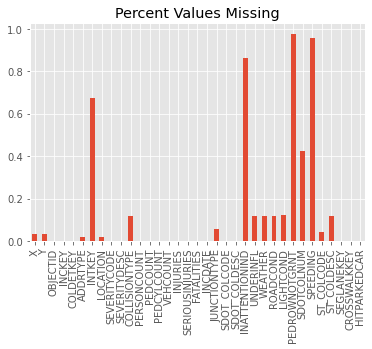

In [4]:
# Load data and set Datetime column
collisions = pd.read_csv('../data/external/Collisions.csv', 
                         parse_dates={'Datetime': ['INCDTTM']}, 
                         infer_datetime_format=True)

# Clean up and set index to datetime
collisions = (
    collisions.set_index('Datetime')
    .sort_index()
    .drop(columns=['EXCEPTRSNDESC', 'EXCEPTRSNCODE', 'REPORTNO', 'STATUS'])
)

# Plot missing values
pct_null = (collisions.isna().sum()/collisions.shape[0]).plot(kind='bar', 
                                                              title="Percent Values Missing")

#### Description of accidents that supossedly have zero people and zero vehicles

We will have to backfill some information based on the collision description. There are > 19,000 collisions that claim to have zero people and zero vehicles involved.

In [36]:
# How many of these involve ZERO people (ie, terrible book-keeping)
no_people = collisions.loc[(collisions['PEDCOUNT'] == 0) & 
           (collisions['PEDCYLCOUNT'] == 0) & 
           (collisions['PERSONCOUNT'] == 0) & 
            (collisions['VEHCOUNT'] == 0)]

no_people_frac = no_people.shape[0]/collisions.shape[0]
print('Fraction of collisions that have zero people and zero vehicles: {:0.4f}\n'.format(no_people_frac))
print('Descriptions of these events:')
# Show descriptions
no_people['SDOT_COLDESC'].value_counts()

Fraction of collisions that have zero people and zero vehicles: 0.0878

Descriptions of these events:


NOT ENOUGH INFORMATION / NOT APPLICABLE                         8060
MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          4765
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    3963
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          894
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           529
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    306
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         184
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          168
MOTOR VEHCILE STRUCK PEDESTRIAN                                  159
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              148
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE             67
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE              24
MOTOR VEHICLE OVERTURNED IN ROAD                                  22
DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                10
PEDALCYCLIST STRUCK MOTOR VEHICLE 

#### Most Dangerous Intersections

We wanted to look at the most dangerous intersections for cyclists and pedestrians. So we started by looking at the most dangerous intersections overall. <b>Note that the intersection key is missing in over 60% of the data! </b>

Most intersections had only 1 collision, but some of them had > 100

In [ ]:
## Look at collision count at specific intersections
n_coll_intersect = collisions.groupby(by='INTKEY').count().sort_values(by='OBJECTID', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.hist(n_coll_intersect['OBJECTID'], bins=50)
ax.set_xlim(0,50)
ax.set_xlabel('Number of Collisions')
ax.set_ylabel('Intersection Count')
ax.set_title("Number of Intersections with High Collisions");

ax = axes[1]
ax.hist(n_coll_intersect['OBJECTID'], bins=10, log=True)
ax.set_xlabel('Number of Collisions')
ax.set_ylabel('Intersection Count (Log Scale)')
ax.set_title("Number of Intersections with High Collisions");

Text(0.5, 20.200000000000003, 'Collision Count')

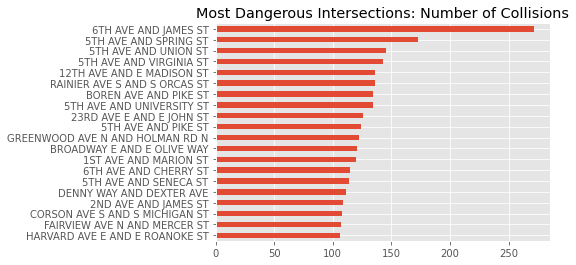

In [31]:
# Find 20 most dangerous intersections
intersections = collisions.copy().set_index('INTKEY')
top_20 = list(n_coll_intersect.index[:20])
title = 'Most Dangerous Intersections: Number of Collisions'

intersections['LOCATION'].loc[top_20].value_counts()[::-1].plot(kind='barh', 
                                                                title=title)
ax.set_xlabel('Collision Count');

#### Collisions that included pedestrians or cyclists (or both)

In [38]:
# Break down by pedestrian or cyclist involvement
pedcycle_count = collisions.groupby(by='PEDCYLCOUNT').count()['OBJECTID']
ped_count = collisions.groupby(by='PEDCOUNT').count()['OBJECTID']

# Get fraction of collisions that included cyclists/pedestrians/no cars
cycle_fraction = pedcycle_count.loc[1:].sum()/pedcycle_count.sum()

# Get fraction of collisions that included pedestrians
ped_fraction = ped_count.loc[1:].sum()/ped_count.sum()

# Are there accidents with no cars involved?
no_cars = collisions.loc[((collisions['PEDCOUNT'] != 0) | \
           (collisions['PEDCYLCOUNT'] != 0)) & \
            (collisions['VEHCOUNT'] == 0)]

#veh_count = collisions.groupby(by='VEHCOUNT').count()['OBJECTID']
no_car_fraction = no_cars.shape[0]/collisions.shape[0]

# # Put these into own dataframe
pd.DataFrame({'Fraction w/cyclist': cycle_fraction, 
              'Fraction w/ped': ped_fraction,
             'Fraction w/no cars': no_car_fraction}, index=range(1))

,Fraction w/cyclist,Fraction w/ped,Fraction w/no cars
0,0.027078,0.036478,0.001102


# Exploring Additional Data

### Possible additional datasets:

- Current Land Use Zoning Detail: https://data.seattle.gov/Land-Base/Current-Land-Use-Zoning-Detail/9nvb-wk9b
- Bike Rack Locations (Contains lat&long): https://data.seattle.gov/Land-Base/Bike-Racks/pbej-cxb2
- Marked Crosswalks (Contains lat&long, including at signal or stop sign): https://data.seattle.gov/Land-Base/Marked-Crosswalks/dx75-5pzj
- Radar Speed Signs (Contains lat&long): https://data.seattle.gov/Land-Base/Radar-Speed-Signs/siht-4gsh

Bike rack locations, marked crosswalks and radar speed signs are datasets containing latitude and longitudes for those objects. We can attempt to calculate the distance of collisions to the these features. It can potentially be added as features to predicting if an intersection has a higher risk of collisions depending on its proximity to certain features.

### Bike Racks

In [2]:
bikeracks = pd.read_csv('../data/Bike_Racks.csv')
bikeracks.head()

,X,Y,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,DISTANCE,WIDTH,UNITID,UNITTYPE,UNITDESC,BIKE_FACILITY,RACK_CAPACITY,DELINEATOR_POSTS,FINISH_TYPE,SURFACE_TYPE,INSTALL_DATE,MOUNT_TYPE,COLOR,MANUFACTURER,MODEL_TYPE,CONDITION,CONDITION_ASSESSMENT_DATE,SIDE,OWNERSHIP,CURRENT_STATUS,PRIMARYDISTRICTCD,SECONDARYDISTRICTCD,OVERRIDEYN,OVERRIDECOMMENT,SHAPE_LNG,SHAPE_LAT
0,1.257066e+06,247817.450418,1,639535,16,19236,427.0,-31.0,BKR-3650,BKR,NW MARKET ST 0240 BLOCK N SIDE ( 402) 402 FT W...,SGL,2,N,GALV,PCC,2016/02/29 00:00:00+00,,,,,GOOD,NaN,N,SDOT,INSVC,DISTRICT6,,N,NaN,-122.389310,47.668757
1,1.278455e+06,227063.233437,2,591433,16,14902,125.0,29.0,BKR-3190,BKR,E UNION ST 0240 BLOCK N SIDE ( 112) 112 FT E/O...,CLSTR,6,N,GALV,PCC,2012/11/30 00:00:00+00,SUFMT,,SDOT,BKR-RLRCK,GOOD,2012/10/20 00:00:00+00,N,SDOT,PLANNED,DISTRICT3,,N,NaN,-122.300910,47.613022
2,1.275207e+06,250005.982260,3,518834,16,17262,370.0,-29.0,BKR-520,BKR,NE 65TH ST 0100 BLOCK S SIDE ( 355) 39 FT W/O ...,SGL,2,N,GALV,PCC,2000/11/12 00:00:00+00,SUFMT,NONE,BKR-CRMTL,BKR-RLRCK,GOOD,2009/07/30 00:00:00+00,S,SDOT,INSVC,DISTRICT4,,N,NaN,-122.315866,47.675737
3,1.271784e+06,228002.570526,4,519092,16,12225,206.0,17.0,BKR-422,BKR,PINE ST 0120 BLOCK NW SIDE ( 193) 11 FT SW/O M...,SGL,2,N,GALV,PCC,2005/05/18 00:00:00+00,SUFMT,NONE,BKR-CRMTL,BKR-RLRCK,GOOD,NaN,NW,SDOT,INSVC,DISTRICT3,,N,NaN,-122.328026,47.615245
4,1.263540e+06,253266.784759,5,517282,16,18846,37.0,-17.0,BKR-2280,BKR,NW 76TH ST 0060 BLOCK N SIDE ( 24) 24 FT W/O ...,SGL,4,N,PAINT,PCC,NaN,SUFMT,BLK,BKR-CORA,BKR-W2704,GOOD,2009/07/31 00:00:00+00,N,SDOT,INSVC,DISTRICT6,,N,NaN,-122.363480,47.684049


In [3]:
bikeracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3953 entries, 0 to 3952
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X                          3940 non-null   float64
 1   Y                          3940 non-null   float64
 2   OBJECTID                   3953 non-null   int64  
 3   COMPKEY                    3953 non-null   int64  
 4   COMPTYPE                   3953 non-null   int64  
 5   SEGKEY                     3953 non-null   int64  
 6   DISTANCE                   3953 non-null   float64
 7   WIDTH                      3946 non-null   float64
 8   UNITID                     3953 non-null   object 
 9   UNITTYPE                   3953 non-null   object 
 10  UNITDESC                   3953 non-null   object 
 11  BIKE_FACILITY              3953 non-null   object 
 12  RACK_CAPACITY              3953 non-null   int64  
 13  DELINEATOR_POSTS           3953 non-null   objec

In [4]:
bikeracks.describe()

,X,Y,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,DISTANCE,WIDTH,RACK_CAPACITY,OVERRIDECOMMENT,SHAPE_LNG,SHAPE_LAT
count,3.940000e+03,3940.000000,3953.000000,3953.000000,3953.0,3953.000000,3953.000000,3946.000000,3953.000000,0.0,3953.000000,3953.000000
mean,1.269985e+06,231892.313295,1977.000000,566358.186441,16.0,17366.003036,237.913503,-0.579321,2.893752,NaN,-122.352250,47.623118
std,7.146816e+03,15411.690509,1141.277135,73356.327275,0.0,50982.801620,514.411184,27.659317,2.548883,NaN,0.290897,0.063000
min,1.249223e+06,185196.853746,1.000000,507180.000000,16.0,1001.000000,-271.000000,-61.000000,0.000000,NaN,-127.390658,46.808300
25%,1.266078e+06,224258.963786,989.000000,517722.000000,16.0,7246.000000,80.000000,-27.000000,2.000000,NaN,-122.352364,47.604526
50%,1.270261e+06,229254.574623,1977.000000,518843.000000,16.0,11453.000000,170.000000,-17.000000,2.000000,NaN,-122.334058,47.618663
75%,1.274628e+06,244876.205375,2965.000000,614504.000000,16.0,14630.000000,276.000000,27.000000,2.000000,NaN,-122.317260,47.661462
max,1.290757e+06,270742.749257,3953.000000,764154.000000,16.0,701839.000000,8226.602746,64.000000,42.000000,NaN,-122.248262,47.732177
